In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
from itertools import zip_longest

import numpy as np
import matplotlib.pyplot as plt

from dogo.results import get_results

In [75]:
lss = ['-', '--']
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rc('font', size=12)

In [76]:
MP748 = get_results("MP748") # No REx
MP749 = get_results("MP749")
MP750 = get_results("MP750")
MP751 = get_results("MP751") # REx 0.1
MP752 = get_results("MP752")
MP753 = get_results("MP753")
MP754 = get_results("MP754") # REx 0.1
MP755 = get_results("MP755")
MP756 = get_results("MP756")
MP772 = get_results("MP772") # REx 5.0
MP773 = get_results("MP773")
MP774 = get_results("MP774")
MP757 = get_results("MP757") # REx 10.0
MP758 = get_results("MP758")
MP759 = get_results("MP759")
MP775 = get_results("MP775") # REx 10.0 - larger batches
MP776 = get_results("MP776")
MP777 = get_results("MP777")
MP778 = get_results("MP778") # REx 10.0 - larger batches - longer training
MP779 = get_results("MP779")
MP780 = get_results("MP780")

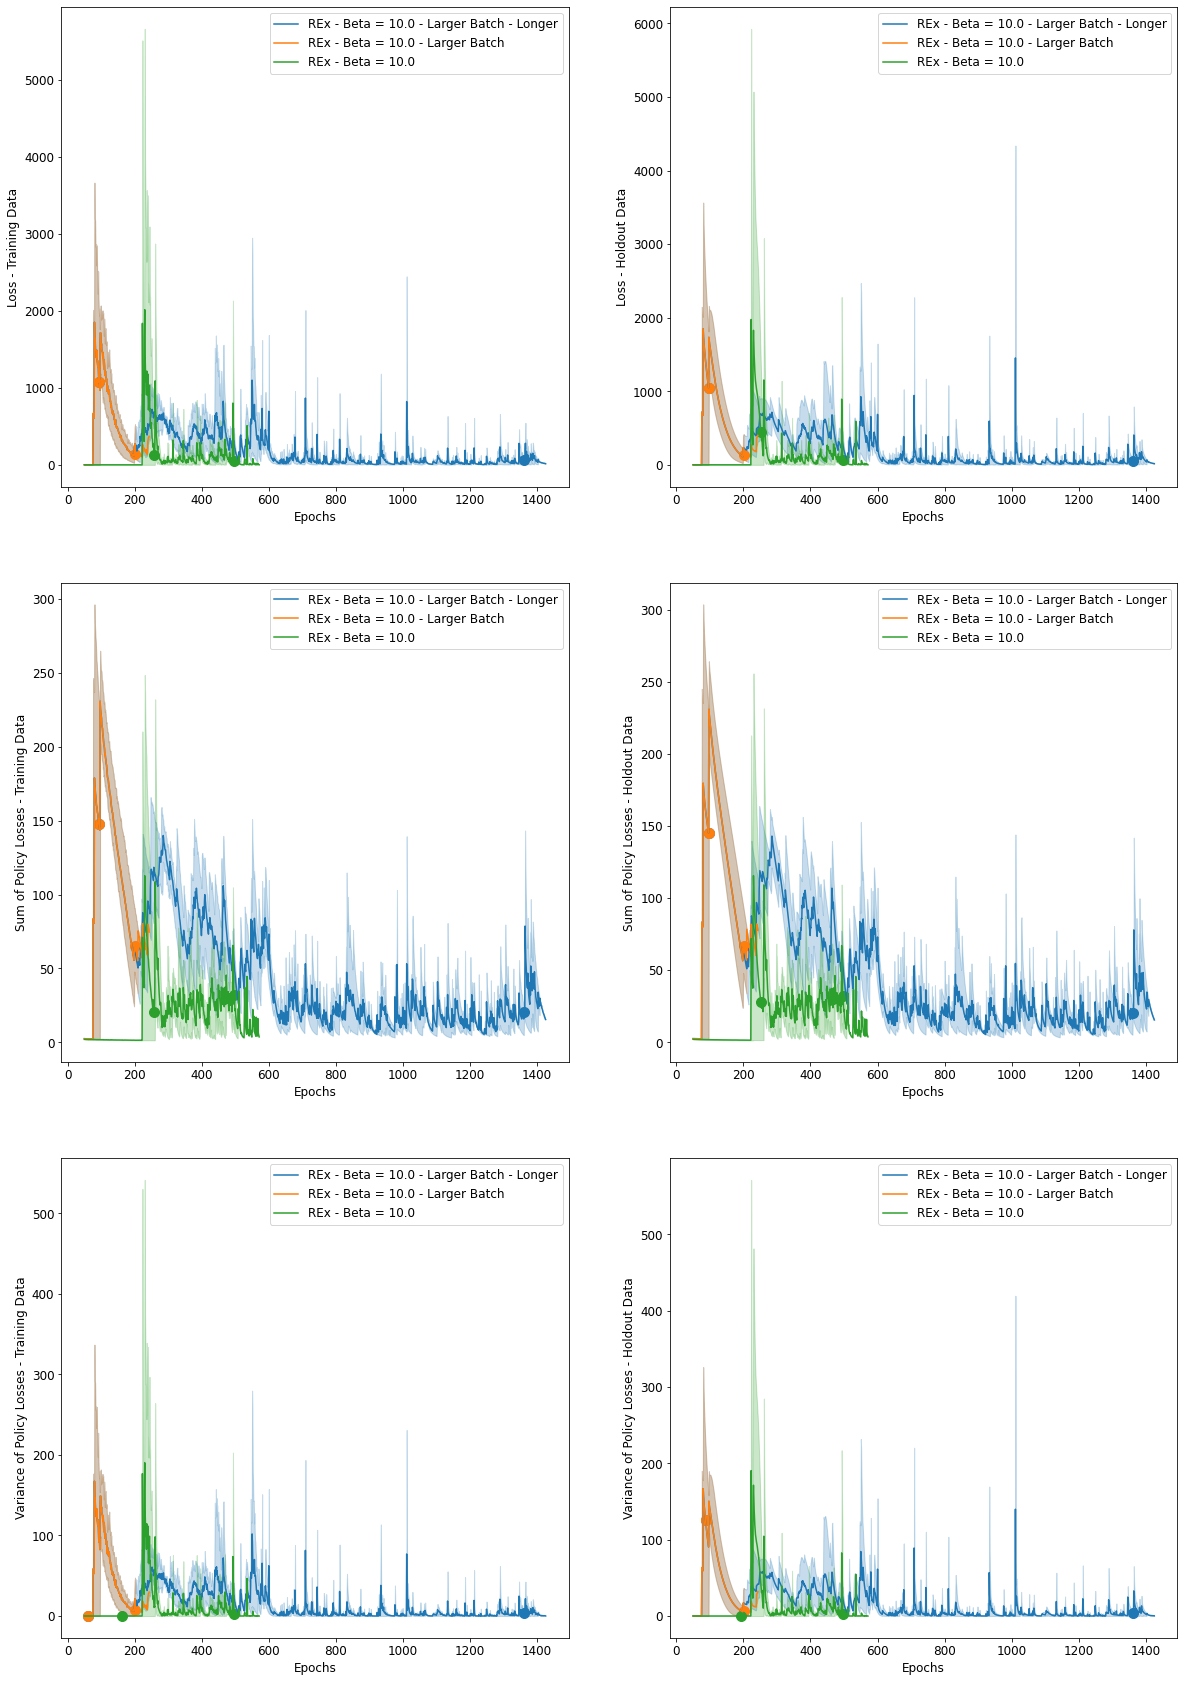

In [81]:
fig, ax = plt.subplots(3, 2, figsize=(20,30))

starting_epoch = 100
for i, (metric, y_label, y_lim) in enumerate([
    ('model_loss_history',                   'Loss - Training Data',                      (0,3.0)),
    ('model_holdout_loss_history',           'Loss - Holdout Data',                       (0,3.0)),
    ('model_pol_total_loss_history',         'Sum of Policy Losses - Training Data',      (0,3.0)),
    ('model_holdout_pol_total_loss_history', 'Sum of Policy Losses - Holdout Data',       (0,3.0)),
    ('model_pol_var_loss_history',           'Variance of Policy Losses - Training Data', (0,0.02)),
    ('model_holdout_pol_var_loss_history',   'Variance of Policy Losses - Holdout Data',  (0,0.02)),
]):
    for j, exp_set_lables in enumerate([
        [
            ((MP778, MP779, MP780), 'REx - Beta = 10.0 - Larger Batch - Longer'),
            ((MP775, MP776, MP777), 'REx - Beta = 10.0 - Larger Batch'),
            ((MP757, MP758, MP759), 'REx - Beta = 10.0'),
            # ((MP772, MP773, MP774), 'REx - Beta = 5.0'),
            # ((MP754, MP755, MP756), 'REx - Beta = 1.0'),
            # ((MP751, MP752, MP753), 'REx - Beta = 0.1'),
            # ((MP748, MP749, MP750), 'No REx'),
        ],
        # [
        #     ((MP683, MP684, MP685), 'Online Training Steps: 0.10M - Transitions: 1.0M'),
        #     ((MP581, MP582, MP583), 'Online Training Steps: 0.25M - Transitions: 1.0M'),
        #     ((MP584, MP585, MP586), 'Online Training Steps: 0.50M - Transitions: 1.0M'),
        #     ((MP587, MP588, MP589), 'Online Training Steps: 1.00M - Transitions: 1.0M'),
        #     ((MP590, MP591, MP592), 'Online Training Steps: 2.00M - Transitions: 1.0M'),
        #     ((MP593, MP594, MP595), 'Online Training Steps: 2.00M - Transitions: 1.0M'),
        # ],
    ]):
        for k, (exp_set, legend_label) in enumerate(exp_set_lables):
            comb_arr= np.vstack(list(zip_longest(*[
                getattr(exp.dynamics, metric).mean(axis=1).values for exp in exp_set
                ],
                fillvalue=np.NaN
            )))[starting_epoch:]
            mean_arr = np.nanmean(comb_arr, axis=-1)
            min_arr = np.nanmin(comb_arr, axis=-1)
            max_arr = np.nanmax(comb_arr, axis=-1)
            x_vals = np.arange(len(mean_arr)) + 50

            ax[i//2, i%2].plot(x_vals, mean_arr, c=cols[k], ls=lss[j], label=legend_label)
            ax[i//2, i%2].fill_between(x_vals, min_arr, max_arr, color=cols[k], alpha=0.25)

            terminal_points = np.sort(comb_arr.argmin(axis=0))[:-1]
            ax[i//2, i%2].scatter(x_vals[terminal_points], mean_arr[terminal_points], color=cols[k], s=100)

    ax[i//2, i%2].set_xlabel('Epochs')
    ax[i//2, i%2].set_ylabel(y_label)
    ax[i//2, i%2].set_ylim(None)
    ax[i//2, i%2].legend()

pass

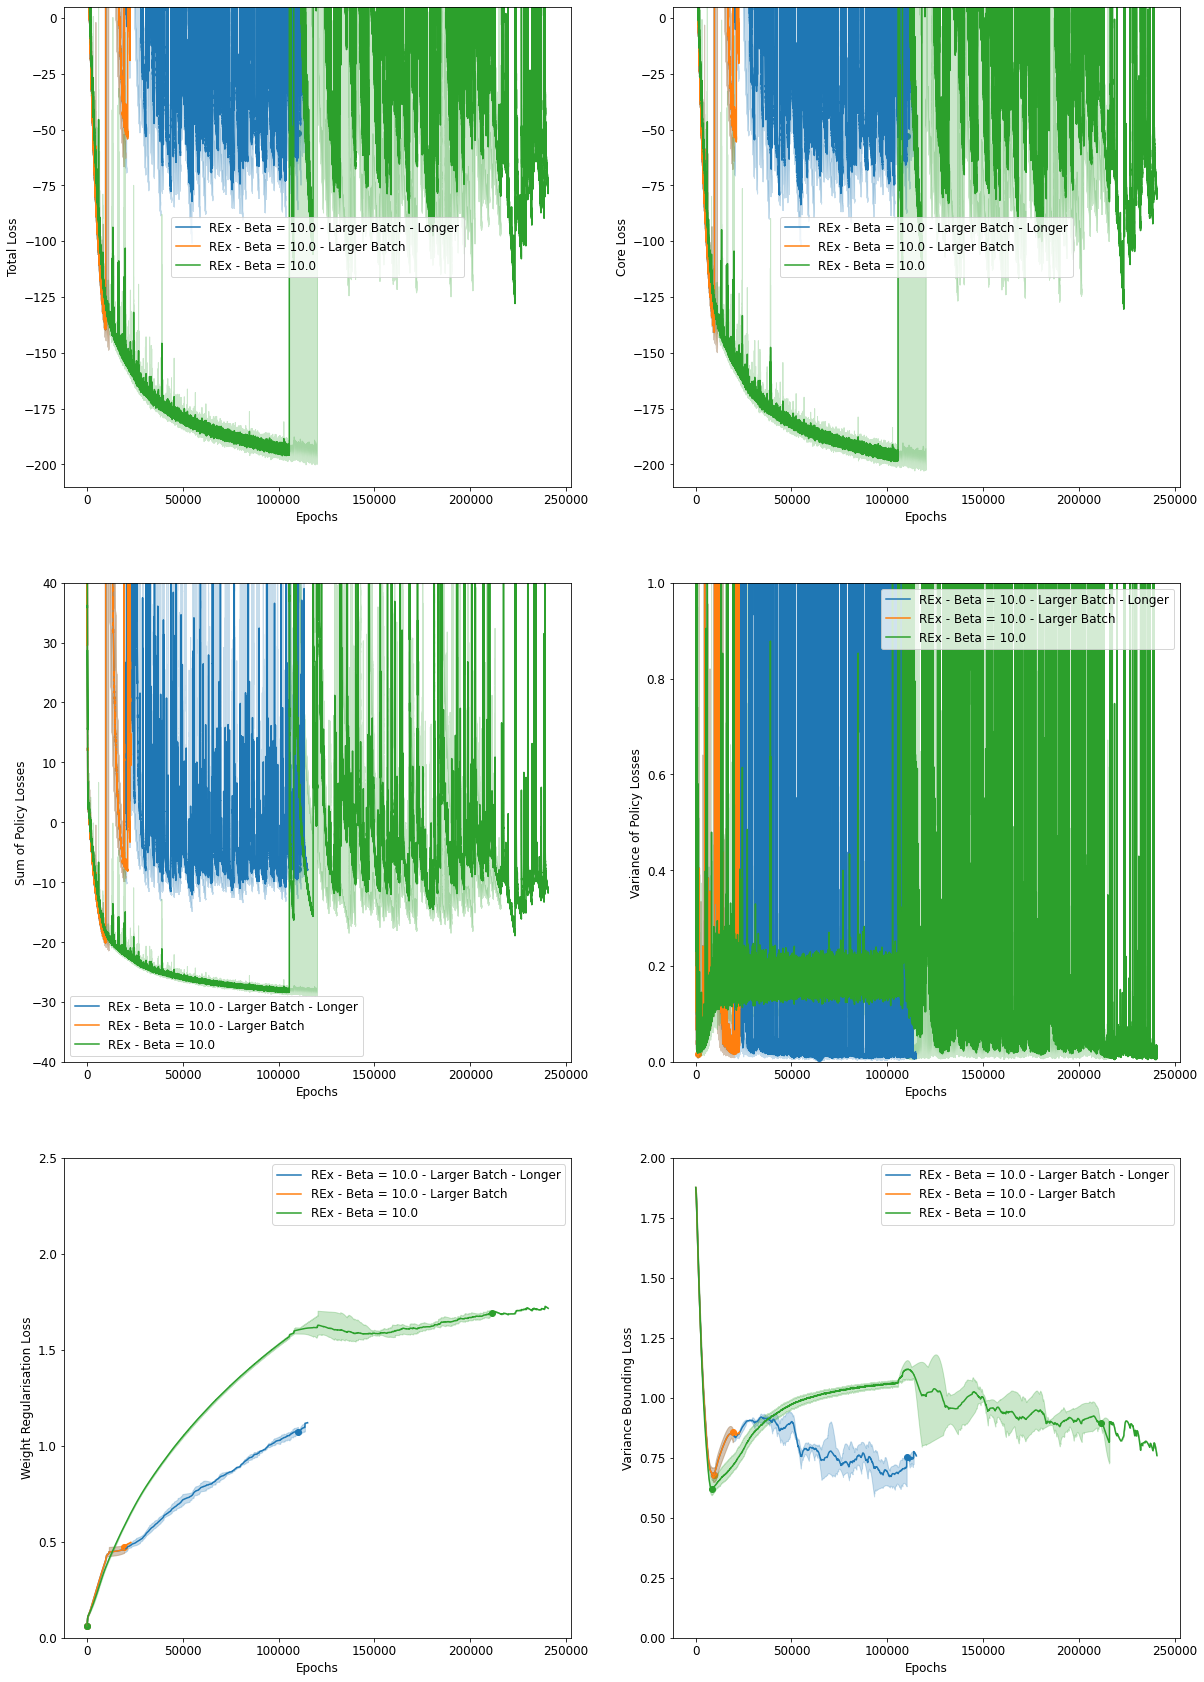

In [86]:
fig, ax = plt.subplots(3, 2, figsize=(20,30))

starting_epoch = 100
for i, (metric, y_label, y_lim) in enumerate([
    ('model_train_loss_history',           'Total Loss',                 (-210,5)),
    ('model_train_core_loss_history',      'Core Loss',                  (-210,5)),
    ('model_train_pol_total_loss_history', 'Sum of Policy Losses',       (-40,40)),
    ('model_train_pol_var_loss_history',   'Variance of Policy Losses',  (0,1)),
    ('model_train_decay_loss_history',     'Weight Regularisation Loss', (0,2.5)),
    ('model_train_var_lim_loss_history',   'Variance Bounding Loss',     (0,2)),
]):
    for j, exp_set_lables in enumerate([
        [
            ((MP778, MP779, MP780), 'REx - Beta = 10.0 - Larger Batch - Longer'),
            ((MP775, MP776, MP777), 'REx - Beta = 10.0 - Larger Batch'),
            ((MP757, MP758, MP759), 'REx - Beta = 10.0'),
            # ((MP772, MP773, MP774), 'REx - Beta = 5.0'),
            # ((MP754, MP755, MP756), 'REx - Beta = 1.0'),
            # ((MP751, MP752, MP753), 'REx - Beta = 0.1'),
            # ((MP748, MP749, MP750), 'No REx'),
        ],
        # [
        #     ((MP683, MP684, MP685), 'Online Training Steps: 0.10M - Transitions: 1.0M'),
        #     ((MP581, MP582, MP583), 'Online Training Steps: 0.25M - Transitions: 1.0M'),
        #     ((MP584, MP585, MP586), 'Online Training Steps: 0.50M - Transitions: 1.0M'),
        #     ((MP587, MP588, MP589), 'Online Training Steps: 1.00M - Transitions: 1.0M'),
        #     ((MP590, MP591, MP592), 'Online Training Steps: 2.00M - Transitions: 1.0M'),
        #     ((MP593, MP594, MP595), 'Online Training Steps: 2.00M - Transitions: 1.0M'),
        # ],
    ]):
        for k, (exp_set, legend_label) in enumerate(exp_set_lables):
            comb_arr= np.vstack(list(zip_longest(*[
                getattr(exp.dynamics, metric).mean(axis=1).values for exp in exp_set
                ],
                fillvalue=np.NaN
            )))[starting_epoch:]
            mean_arr = np.nanmean(comb_arr, axis=-1)
            min_arr = np.nanmin(comb_arr, axis=-1)
            max_arr = np.nanmax(comb_arr, axis=-1)
            x_vals = np.arange(len(mean_arr)) + 50

            ax[i//2, i%2].plot(x_vals, mean_arr, c=cols[k], ls=lss[j], label=legend_label)
            ax[i//2, i%2].fill_between(x_vals, min_arr, max_arr, color=cols[k], alpha=0.25)

            terminal_points = np.sort(comb_arr.argmin(axis=0))[:-1]
            ax[i//2, i%2].scatter(x_vals[terminal_points], mean_arr[terminal_points], color=cols[k])

    ax[i//2, i%2].set_xlabel('Epochs')
    ax[i//2, i%2].set_ylabel(y_label)
    ax[i//2, i%2].set_ylim(y_lim)
    ax[i//2, i%2].legend()

pass

In [88]:
np.mean(MP759.dynamics.model_train_pol_var_loss_history.values, axis=0)

array([4.54889117e+02, 3.16696001e+01, 1.34262039e+01, 1.28474793e+01,
       9.40116320e+02, 3.97431431e+01, 3.97780677e-01])